<a href="https://colab.research.google.com/github/vbanai/ML-Technics-in-Sales-and-Marketing/blob/main/RECOMMENDATION_SYSTEMS_Groceries_Market_Basket_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RECOMMENDATION SYSTEMS

1.) MARKET BASKET ANALYIS

In [1]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#from google.colab import drive
#drive.mount("/content/drive", force_remount=True)  #(choose banaiviktor@gmail.com)

In [ ]:
#Gmb_dataset=pd.read_csv("/content/drive/MyDrive/groceries - groceries.csv")

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "viktorbanai" # username from the json file
os.environ['KAGGLE_KEY'] = "9431db56af1a1a63cab88b4e516a2248" # key from the json file
!kaggle datasets download -d irfanasrullah/groceries # api copied from kaggle


  0% 0.00/168k [00:00<?, ?B/s]
100% 168k/168k [00:00<00:00, 11.6MB/s]


In [3]:
!mkdir file_destination

In [4]:
!unzip -u "/content/groceries.zip" -d "/content/file_destination"

Archive:  /content/groceries.zip
  inflating: /content/file_destination/groceries - groceries.csv  
  inflating: /content/file_destination/groceries.csv  


In [5]:
Gmb_dataset=pd.read_csv("/content/file_destination/groceries - groceries.csv")

In [ ]:
Gmb_dataset.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Gmb_dataset.isna().sum()

In [ ]:
Gmb_dataset.pop('Item(s)')

In [7]:
Gmb_dataset_conversiontolist=Gmb_dataset.to_numpy('str').tolist()

In [8]:
# getting a clear list of the transactions
Gmb_dataset_list=[]
for i in range(len(Gmb_dataset_conversiontolist)):
  innerlist=[]
  for k in range(len(Gmb_dataset_conversiontolist[i])):  
    if Gmb_dataset_conversiontolist[i][k]!="nan":
      innerlist.append(Gmb_dataset_conversiontolist[i][k])

  Gmb_dataset_list.append(innerlist)

In [ ]:
Gmb_dataset_list[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [ ]:
#Number of transactions
len(Gmb_dataset_list)

9835

In [ ]:
#How many elements can be found in the database
element_number=0
for i in Gmb_dataset_list:
  a=int(len(i))
  element_number +=a
element_number

43367

In [ ]:
#Creating 1D list

OneDlist=[x for i in Gmb_dataset_list for x in i]
  

In [ ]:
len(OneDlist)

43367

In [ ]:
#Counting the products in the dataset

products={}
for i in OneDlist:
  products[i]=products.get(i,0)+1

products

In [ ]:
len(products)

169

In [ ]:
#how many items of the product people bought the most can be found in the list
max(products.values())

2513

In [ ]:
# what is the name of this product

for  key, value in products.items():
  if max(products.values())==value:
    print(key)

whole milk


In [ ]:
Products_sorted = sorted(products.items(), key=lambda x: x[1], reverse=True)  
Products_sorted

In [ ]:
import copy

products_deepcopy = copy.deepcopy(products)

top10frequentlypurchasedproduct={}
for i in range(10):
  for  key, value in list(products_deepcopy.items()):
    if value==max(products_deepcopy.values()):
      top10frequentlypurchasedproduct[key]=value
      del products_deepcopy[key]
      break

top10frequentlypurchasedproduct

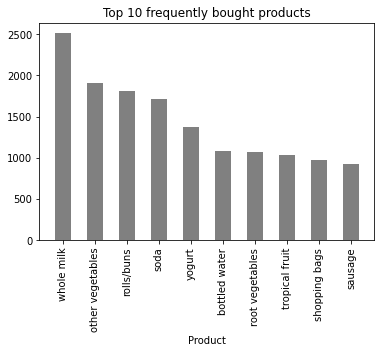

In [ ]:
#my_colors = 'navy','blue',"lightblue","aqua"
#plt.figsize=(20,7)
plt.bar(top10frequentlypurchasedproduct.keys(), top10frequentlypurchasedproduct.values(), width=0.5, color='grey')#, color=my_colors)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top 10 frequently bought products')
plt.show()

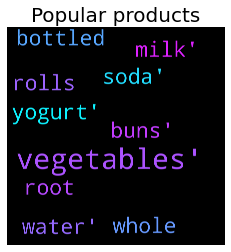

In [ ]:
from wordcloud import WordCloud

a=list(top10frequentlypurchasedproduct.keys())
a
wordcloud = WordCloud(width = 6000,  height = 6000, max_words = 10, colormap='cool').generate(str(a))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular products',fontsize = 20)
plt.show()

In [ ]:
#support of the most purchased product
#Support means product or products / number of transactions

support=max(products.values())/int(len(Gmb_dataset_list))
support


0.25551601423487547

Calculating SUPPORT for product-pairs without using built-in library to show how the method works




In [ ]:
#SUPPORT FOR ALL PAIRS WITH THRESHOLD 0.05
#creating association rule list restricted to 2 elements
product_names=list(set(OneDlist))
pairs=[]
for i in range(0, len(product_names)):
  for k in range(0, len(product_names)):
    if product_names[i] !=product_names[k]:
      pairs.append([product_names[i], product_names[k]])

pairs_without_duplicates=[]

for i in pairs:
  if i not in pairs_without_duplicates:
    pairs_without_duplicates.append(i)


len(pairs_without_duplicates)
  


28392

In [ ]:
dict={}
for k in pairs_without_duplicates:
  counter=0
  for i in Gmb_dataset_list:
    if k[0] in i and k[1] in i:
      counter +=1
  dict[tuple(k)]=[
        {'Support': counter/int(len(Gmb_dataset_list))}, 
        {'Confidence':counter/products[k[0]]},
        # {'Confidence':counter/int(len(Gmb_dataset_list))/(products[k[0]]/int(len(Gmb_dataset_list)))},
        {'Lift': counter/int(len(Gmb_dataset_list))/( (products[k[0]]/int(len(Gmb_dataset_list)))*(products[k[1]]/int(len(Gmb_dataset_list))) )}
         ]
  
    

In [ ]:
dict['whisky', 'misc. beverages'][2]['Lift']
for i in dict:
  print(dict[i][2])
  break

{'Lift': 0.9866573033707865}


In [ ]:
for i in dict:
  #print(dict[i][0]['Support'])
  if (dict[i][0]['Support'])>0.05:
    print(i, ":", dict[i])
#Lift measures how many times more often X and Y occur together than expected if 
#they are statistically independent of each other. Lift is a measure of how X and
#Y are really related rather than coincidentally happening together

('rolls/buns', 'whole milk') : [{'Support': 0.05663446873411286}, {'Confidence': 0.30790491984521834}, {'Lift': 1.2050317893663838}]
('other vegetables', 'whole milk') : [{'Support': 0.07483477376715811}, {'Confidence': 0.38675775091960063}, {'Lift': 1.5136340948246207}]
('yogurt', 'whole milk') : [{'Support': 0.05602440264361973}, {'Confidence': 0.40160349854227406}, {'Lift': 1.5717351405345263}]
('whole milk', 'rolls/buns') : [{'Support': 0.05663446873411286}, {'Confidence': 0.2216474333465977}, {'Lift': 1.2050317893663838}]
('whole milk', 'other vegetables') : [{'Support': 0.07483477376715811}, {'Confidence': 0.29287703939514526}, {'Lift': 1.5136340948246207}]
('whole milk', 'yogurt') : [{'Support': 0.05602440264361973}, {'Confidence': 0.2192598487863112}, {'Lift': 1.5717351405345263}]


In [ ]:
#creating association rule list restricted to 2 elements (position-flip is also excluded)
product_names=list(set(OneDlist))
pairs=[]
for i in range(0, len(product_names)):
  for k in range(0, len(product_names)):
    if product_names[i] !=product_names[k]:
      H=False
      for x in pairs:
        if x[0]==product_names[k] and x[1]==product_names[i]:
          H=True
          break
      if H==False:
        pairs.append([product_names[i], product_names[k]])

pairs_without_duplicates=[]

for i in pairs:
  if i not in pairs_without_duplicates:
    pairs_without_duplicates.append(i)


len(pairs_without_duplicates)

14196

In [ ]:
dict={}
for k in pairs_without_duplicates:
  counter=0
  for i in Gmb_dataset_list:
    if k[0] in i and k[1] in i:
      counter +=1
  dict[tuple(k)]=counter/int(len(Gmb_dataset_list))

In [ ]:
for i in dict:
  if dict[i]>0.05:
    print(i, ":", dict[i])

('other vegetables', 'whole milk') : 0.07483477376715811
('yogurt', 'whole milk') : 0.05602440264361973
('rolls/buns', 'whole milk') : 0.05663446873411286


In [ ]:
#easier method to create pairs without duplicates
from itertools import permutations
pairs_without_duplicates_withpermutationmethod=list(permutations(product_names, 2))
len(pairs_without_duplicates_withpermutationmethod)

28392

In [ ]:
Gmb_dataset_list

Market basket analysis with built-in library

In [ ]:
#Using built-in libary to make this coding simplier
#True_False ecoding
te=TransactionEncoder()
te_ary=te.fit(Gmb_dataset_list).transform(Gmb_dataset_list)

True_False_DF=pd.DataFrame(te_ary, columns=te.columns_)
True_False_DF

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,...,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False,False,False,Fa

In [ ]:
te.columns_[1]

'UHT-milk'

In [ ]:
true=pd.DataFrame(te_ary)
true

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9832,Fals

In [ ]:
#with a slight different code of True_False ecoding
encoder=TransactionEncoder().fit(Gmb_dataset_list)
onehot=encoder.transform(Gmb_dataset_list)
onehot=pd.DataFrame(onehot, columns=encoder.columns_)
onehot


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,...,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False,False,False,Fa

In [ ]:
frequent_itemsets=apriori(onehot, min_support=0.05, use_colnames=True)
print(frequent_itemsets)

     support                        itemsets
0   0.052466                          (beef)
1   0.080529                  (bottled beer)
2   0.110524                 (bottled water)
3   0.064870                   (brown bread)
4   0.055414                        (butter)
5   0.077682                   (canned beer)
6   0.082766                  (citrus fruit)
7   0.058058                        (coffee)
8   0.053279                          (curd)
9   0.063447                 (domestic eggs)
10  0.058973                   (frankfurter)
11  0.072293         (fruit/vegetable juice)
12  0.058566                     (margarine)
13  0.052364                       (napkins)
14  0.079817                    (newspapers)
15  0.193493              (other vegetables)
16  0.088968                        (pastry)
17  0.075648                     (pip fruit)
18  0.057651                          (pork)
19  0.183935                    (rolls/buns)
20  0.108998               (root vegetables)
21  0.0939

In [ ]:
#rule mining confidence (conditional probabilit x product>y product support (x&y)/support x) and lift shows the probability of purchase of the other product
rules=association_rules(frequent_itemsets, metric='confidence', min_threshold=0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132


In [ ]:
rules2=rules[['antecedents', 'consequents', 'support','confidence', 'lift']]
rules2

,antecedents,consequents,support,confidence,lift
0,(whole milk),(other vegetables),0.074835,0.292877,1.513634
1,(other vegetables),(whole milk),0.074835,0.386758,1.513634
2,(whole milk),(rolls/buns),0.056634,0.221647,1.205032
3,(rolls/buns),(whole milk),0.056634,0.307905,1.205032
4,(whole milk),(yogurt),0.056024,0.219260,1.571735
5,(yogurt),(whole milk),0.056024,0.401603,1.571735


In [ ]:
rule3=rules2[rules2['confidence']>0.22]
rule3

,antecedents,consequents,support,confidence,lift
0,(other vegetables),(whole milk),0.074835,0.386758,1.513634
1,(whole milk),(other vegetables),0.074835,0.292877,1.513634
2,(rolls/buns),(whole milk),0.056634,0.307905,1.205032
3,(whole milk),(rolls/buns),0.056634,0.221647,1.205032
4,(yogurt),(whole milk),0.056024,0.401603,1.571735


In [ ]:
rules4=rules[['antecedents', 'support','confidence']]

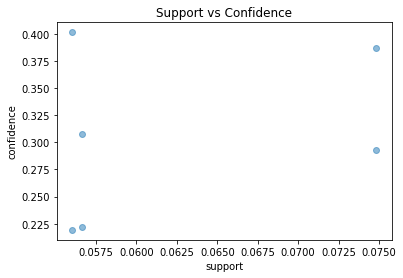

In [ ]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

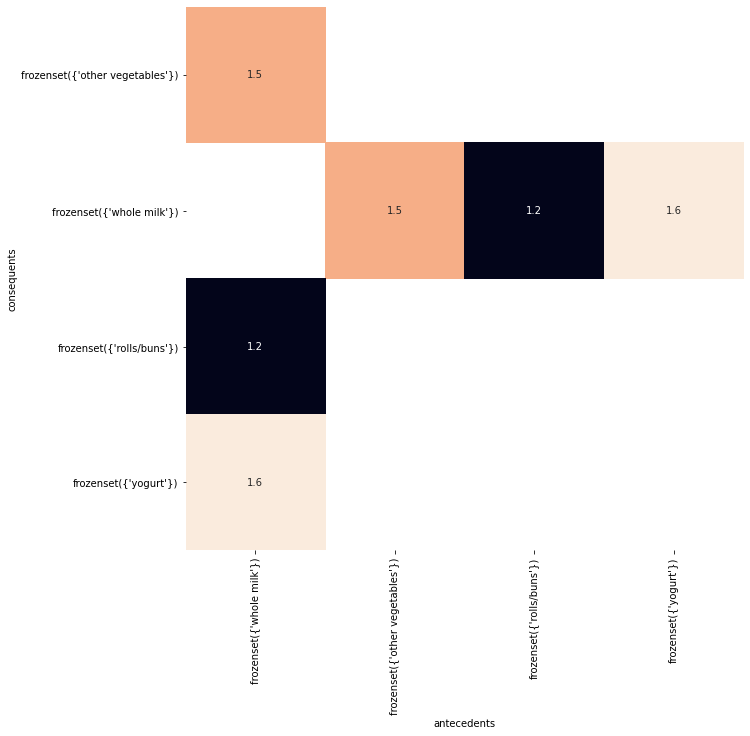

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
pivot = rules.pivot(index = 'consequents', 
                   columns = 'antecedents', values= 'lift')
sns.heatmap(pivot,annot=True,cbar=False, ax = ax)
plt.show()

In [ ]:
data = {'antecedents':  ['whole milk', 'other vegetables', 'whole milk', 'rolls/buns', 'whole milk', 'yogurt'],
        'consequents': ['other vegetable','whole milk','rolls/buns','whole milk','yogurt','whole milk'],
        'rule':['1','2','3','4','5','6']
        }

df = pd.DataFrame (data, columns = ['antecedents','consequents','rule'])
df['rule'] = df['rule'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   antecedents  6 non-null      object
 1   consequents  6 non-null      object
 2   rule         6 non-null      object
dtypes: object(3)
memory usage: 272.0+ bytes


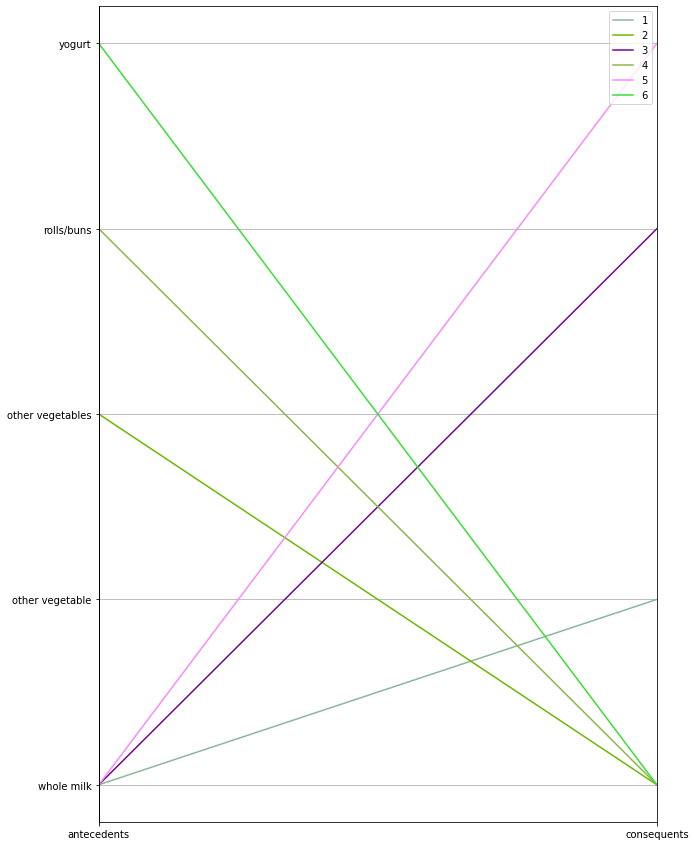

In [ ]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10,15))
parallel_coordinates(df, 'rule')
plt.show()

Association rule can be useful when we are plannig:

- Product placement
- Promotional discount
- POS point of sales advertisement for products whose association pair is planned to buy
- Product boundling
- X and Y product can be combined to a new product

2.) COLLABORATIVE FILTERING TECHNIQUE





A) USER BASED FILTERING

User based collaborative filtering is used to recommend products based on the history of user behaviours and
consequently looks at the similarities between users. User-to-user similarity matrix has to be created on the 
basis of cosine similarity to check which customers has similar buying patterns and to set hierarchy among these customers.
Finally we check which are the products in the similar users' basket that are missing from the examined consumer's basket, and these products can be recommend to the given customer with respect to the hierarchy created on the basis of similarity.

In [ ]:
#Biggest basket
BiggestBasket=Gmb_dataset.loc[np.where(Gmb_dataset.apply(lambda x: x.isnull().sum(), axis=1)==0)[0][0]]
BiggestBasket

In [9]:
#Creating a matrix that contains the customers as the index, and each invidividual item as a column

te=TransactionEncoder()
te_ary=te.fit(Gmb_dataset_list).transform(Gmb_dataset_list)

True_False_DF=pd.DataFrame(te_ary, columns=te.columns_)
True_False_DF

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,...,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False,False,False,Fa

In [10]:
customer_item_matrix = True_False_DF.applymap(lambda x: 1 if x ==True else 0)

Creating User-to-User Similarity Matrix

In [11]:
# Using the sklearn cosine_similarity function to compute the pairwise cosine similarities between the cusomters accourding the their basket
# 1 means that they are identical  0 means no any connection

from sklearn.metrics.pairwise import cosine_similarity
User_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))
User_user_sim_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9795,9796,9797,9798,9799,9800,9801,9802,9803,9804,9805,9806,9807,9808,9809,9810,9811,9812,9813,9814,9815,9816,9817,9818,9819,9820,9821,9822,9823,9824,9825,9826,9827,9828,9829,9830,9831,9832,9833,9834
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.288675,...,0.000000,0.133631,0.0,0.223607,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.223607,0.000000,0.0,0.250000,0.000000,0.000000,0.204124,0.000000,0.000000,0.000000,0.0,0.288675,0.000000,0.0,0.000000,0.316228,0.000000,0.000000,0.0,0.00,0.158114,0.204124,0.000000,0.000000,0.000000,0.121268,0.0,0.158114,0.25,0.000000
1,0.000000,1.000000,0.000000,0.288675,0.000000,0.258199,0.000000,0.000000,0.0,0.000000,0.258199,0.384900,0.000000,0.000000,0.408248,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.258199,0.174078,0.000000,0.577350,0.000000,0.000000,0.000000,0.288675,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.288675,0.154303,0.0,0.000000,0.000000,0.000000,0.218218,0.384900,0.192450,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.218218,0.000000,0.288675,0.0,0.000000,0.166667,0.0,0.384900,0.000000,0.000000,0.408248,0.0,0.00,0.000000,0.000000,0.192450,0.000000,0.218218,0.140028,0.0,0.182574,0.00,0.258199
2,0.000000,0.000000,1.000000,0.000000,0.500000,0.447214,0.000000,0.000000,0.0,0.707107,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214,0.353553,0.000000,0.000000,0.0,0.0,0.500000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.353553,0.000000,0.333333,0.333333,0.0,0.000000,0.577350,0.0,0.000000,0.000000,0.000000,0.408248,0.000000,0.500000,0.500000,0.0,0.000000,0.288675,0.0,0.333333,0.000000,0.288675,0.000000,0.0,0.00,0.000000,0.000000,0.333333,0.000000,0.000000,0.242536,0.0,0.000000,0.00,0.000000
3,0.000000,0.288675,0.000000,1.000000,0.000000,0.223607,0.000000,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.223607,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.267261,0.0,0.000000,0.000000,0.000000,0.188982,0.166667,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.188982,0.000000,0.250000,0.0,0.000000,0.144338,0.0,0.166667,0.158114,0.144338,0.353553,0.0,0.00,0.158114,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.158114,0.00,0.000000
4,0.000000,0.000000,0.500000,0.000000,1.000000,0.223607,0.000000,0.223607,0.0,0.353553,0.223607,0.166667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.500000,0.0,0.500000,0.000000,0.150756,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.188982,0.447214,0.353553,0.000000,0.000000,0.0,0.0,0.500000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.223607,0.353553,0.000000,0.166667,0.333333,0.0,0.000000,0.288675,0.0,0.000000,0.204124,0.000000,0.408248,0.000000,0.250000,0.250000,0.0,0.000000,0.433013,0.0,0.166667,0.000000,0.288675,0.353553,0.0,0.25,0.316228,0.204124,0.333333,0.000000,0.188982,0.121268,0.0,0.158114,0.00,0.223607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0.121268,0.140028,0.242536,0.000000,0.121268,0.216930,0.000000,0.000000,0.0,0.171499,0.108465,0.323381,0.242536,

Experiment with CUSTOMER 1

In [ ]:
#which customers can be considered to be similiar to CUSTOMER 1
User_user_sim_matrix.loc[0].sort_values(ascending=False)

0       1.000000
8837    0.707107
7219    0.707107
3613    0.577350
6882    0.577350
          ...   
6303    0.000000
6304    0.000000
6305    0.000000
6306    0.000000
4917    0.000000
Name: 0, Length: 9835, dtype: float64

In [ ]:
Similar_users=[]
for i in range(3):
  most_similar_user = User_user_sim_matrix.loc[0].sort_values(ascending=False).reset_index().iloc[i+1, 0]
  Similar_users.append([str((int(i)+1))+(str(". most similar customer")), most_similar_user])

In [ ]:
Similar_users

[['1. most similar customer', 8837],
 ['2. most similar customer', 7219],
 ['3. most similar customer', 3613]]

In [ ]:
#items bought by the most similar customers
Items_by_the_most_similar_users=[]
for i in range(len(Similar_users)):
  items_bought_by_cust_x = set(customer_item_matrix.loc[Similar_users[i][1]].iloc[customer_item_matrix.loc[Similar_users[i][1]].to_numpy().nonzero()].index)
  Items_by_the_most_similar_users.append([(str(Similar_users[i][0])+str(" ")+str(Similar_users[i][1])), items_bought_by_cust_x])
  
  

In [ ]:
Items_by_the_most_similar_users

[['1. most similar customer 8837', {'citrus fruit', 'margarine'}],
 ['2. most similar customer 7219', {'citrus fruit', 'semi-finished bread'}],
 ['3. most similar customer 3613',
  {'citrus fruit', 'semi-finished bread', 'whole milk'}]]

In [ ]:
suggested_products=[]
for i in range(len(Items_by_the_most_similar_users)):
  items_to_recommend_to_a = Items_by_the_most_similar_users[i][1] - set(customer_item_matrix.loc[0][customer_item_matrix.loc[0]==1].index)
  if len(items_to_recommend_to_a) !=0:
    suggested_products.append([str(i+1)+".) ", items_to_recommend_to_a])
  if len(items_to_recommend_to_a) ==0:
    suggested_products.append(np.NaN)

suggested_products

[nan, nan, ['3.) ', {'whole milk'}]]

In [ ]:
len(suggested_products[0][1])


0

In [ ]:
items_bought_by_cust3636=set(customer_item_matrix.loc[3636][customer_item_matrix.loc[3636]==1].index)
items_bought_by_cust3636

#product list with another technic just for fun
#items_bought_by_3636 = set(customer_item_matrix.loc[3636].iloc[customer_item_matrix.loc[3636].to_numpy().nonzero()].index)
#items_bought_by_3636

{'coffee', 'newspapers', 'tropical fruit', 'yogurt'}

In [ ]:
set(customer_item_matrix.loc[0].iloc[customer_item_matrix.loc[0].to_numpy().nonzero()].index)

{'citrus fruit', 'margarine', 'ready soups', 'semi-finished bread'}

Creating the user based RECOMMENDATION ENGINE </br>
It is just an example I came up, but it can be modified on the basis of the clients' strategy and priorities.


</br>
Creating a complex recommendation system:</br>
- Detecting the first 3 most similar users compared to the given customer</br>
- In the matrix you can find in a prioritised way the baskets of the 3 most similar customers without the poducts the given customer has already chosen</br>
- In the last column I created a combined recommendation, prioritizing the products. On the first place I put that product which frequency is the highest in the 3 baskets, on the second place I chose that products which have the second highest appearance and so on. Finaly I recommend those products from the "Suggested product(s) on the 1. place" basket, which has 1 frequency in the joined basket. Other  products having 1 frequency in the joined basket should be skipped.

In [75]:
from collections import Counter  #for count element in a list
import operator  #for sorting dict
from typing import Dict   # can use isinstance dict

Recommendations=[]
def get_items_to_recommend_cust(cust_a):
  Similar_users=[]
  Items_by_the_most_similar_users=[]
  suggested_products=[]
  for i in range(3):
    most_similar_user = User_user_sim_matrix.loc[cust_a].sort_values(ascending=False).reset_index().iloc[i+1, 0]
    Similar_users.append([str((int(i)+1))+(str(". most similar customer")), most_similar_user])


  for i in range(len(Similar_users)):
    items_bought_by_cust_x = set(customer_item_matrix.loc[Similar_users[i][1]].iloc[customer_item_matrix.loc[Similar_users[i][1]].to_numpy().nonzero()].index)
    Items_by_the_most_similar_users.append([(str(Similar_users[i][0])+str(" ")+str(Similar_users[i][1])), items_bought_by_cust_x])

    
  for i in range(len(Items_by_the_most_similar_users)):
    items_to_recommend_to_a = Items_by_the_most_similar_users[i][1] - set(customer_item_matrix.loc[i].iloc[customer_item_matrix.loc[i].to_numpy().nonzero()].index)
    suggested_products.append([str(i+1)+".) ", items_to_recommend_to_a])

  return Recommendations.append(suggested_products)
 

for i in range(len(Gmb_dataset)):
  get_items_to_recommend_cust(i)

Recommendation_df=pd.DataFrame(Recommendations)

Recommendation_df["Suggested product(s) on the 1. place"]=Recommendation_df[0].apply(lambda x: "" if len(list(x[1]))==0 else ", ".join(list(x[1])))
Recommendation_df["Suggested product(s) on the 2. place"]=Recommendation_df[1].apply(lambda x: "" if len(list(x[1]))==0 else ", ".join(list(x[1])))
Recommendation_df["Suggested product(s) on the 3. place"]=Recommendation_df[2].apply(lambda x: "" if len(list(x[1]))==0 else ", ".join(list(x[1])))
Recommendation_df.drop([0,1,2], axis=1, inplace=True)

Recommendation_df['Customer nr'] = Recommendation_df.index

#COUNTING THE DICT VALUES
Recommendation_df['Suggested product(s) on the 1. place']+", "+Recommendation_df['Suggested product(s) on the 2. place']+", "+Recommendation_df['Suggested product(s) on the 3. place']

def sum(a,b,c):
  if len(list(a))==0:
    value=b+", "+c
    return value
  if len(list(b))==0:
    value=a+", "+c
    return value
  if len(list(c))==0:
    value=a+", "+b
    return value
  if len(list(a))==0 and len(list(b))==0 and len(list(c))==0:
    return ""
  if len(list(a))==0 and len(list(b))==0:
    value=c
    return c
  if len(list(a))==0 and len(list(c))==0:
    value=b
    return b
  if len(list(b))==0 and len(list(c))==0:
    value=a
    return a
  else:
    value=a+", "+b+", "+c
    return value

Recommendation_df["Combined recommendation"]=Recommendation_df[['Suggested product(s) on the 1. place', "Suggested product(s) on the 2. place", "Suggested product(s) on the 3. place"]].apply(lambda x: sum(x[0], x[1], x[2]), axis=1)

def count(a):
  if len(list(a))!=0:
    value=Counter(a.split(', '))
    return value
  else:
    return a

Recommendation_df["Combined recommendation"]=Recommendation_df["Combined recommendation"].apply(lambda x: count(x))# Counter(x.split(', ')))

Recommendation_df["Combined recommendation"]=Recommendation_df["Combined recommendation"].apply(lambda x: sorted(x.items(), key=operator.itemgetter(1), reverse=True)) 
Recommendation_df["Combined recommendation"] = Recommendation_df["Combined recommendation"].apply(lambda x: {k: v for k, v in x})

#DONT CREATE COMBINED RECOMMENDATION IF WE HAVE JUST "1" VALUES IN THE DICTS
def give_value(a):
  if list(a.values())[0]==1:
    value=""
    return value
  else:
    return a

Recommendation_df['Combined recommendation']=Recommendation_df['Combined recommendation'].apply(lambda x: give_value(x))

def give_value_e(a):
  if isinstance(a, Dict)==True:
    if list(a.values())[0]==1:
      value=""
      return value
  else:
    value=""
    return value

Recommendation_df['extra']=Recommendation_df['Combined recommendation'].apply(lambda x: give_value_e(x))

#CREATING COMBINED RECOMMENDATION IF WE HAVE 2 VALUES AND HAVING PRODUCT(s) IN THE 1. RECOMMENDATION
def give_value(a, b):
  if len(list(a))!=0 and isinstance(b, Dict)==True:
    if list(b.values())[0]>1:
      value = [i for i in b.items() if i[1]>1]
      value = [i[0].strip(" ") for i in value]
      value = ", ".join(value)
      return value
  else:
    return b

Recommendation_df['Combined recommendation']=Recommendation_df[['Suggested product(s) on the 1. place', 'Combined recommendation']].apply(lambda x: give_value(x[0], x[1]), axis=1)


       #creating the extra collumn

       
def give_value_e(a, b):
  if len(list(b))!=0 and len(list(a))!=0:
    value = set(a.strip(" ").split(", "))-set(b.split(", "))
    value = list(value)
    value = ", ".join(value).strip()
 #   print(set(a.strip(" ").split(", ")))
 #   print(set(b.split(", ")))
 #   print("eredemény: ", set(a.strip(" ").split(", "))-set(b.split(", ")))
 #   print(value)
 #   print("***")
    return value
  else:
    return ""

Recommendation_df['extra']=Recommendation_df[['Suggested product(s) on the 1. place', 'Combined recommendation']].apply  \
                                                   (lambda x: give_value_e(x[0], x[1]), axis=1)


#def give_value_c(a, b, c):
#  if pd.isnull(b)==False and len(list(a))!=0:
 #   value=b+", "+c
 #   return value
 # else:
 #   return b
    

#Recommendation_df["Combined recommendation"]=Recommendation_df[['Suggested product(s) on the 1. place', 'Combined recommendation', 'extra']].apply(lambda x: give_value_c(x[0], x[1], x[2]), axis=1)

#CREATING COMBINED RECOMMENDATION IF WE HAVE 2 VALUES AND NOT HAVING PRODUCT IN THE 1. RECOMMENDATION
def give_value(a, b):
  if  len(list(a))==0 and isinstance(b, Dict)==True:
    if list(b.values())[0]>1:
      value = [i for i in b.items() if i[1]>1]
      value = [i[0].strip(" ") for i in b]
      value = ", ".join(b)

      return value
  else:
    return b



Recommendation_df['Combined recommendation']=Recommendation_df[['Suggested product(s) on the 1. place', 'Combined recommendation']].apply(lambda x: give_value(x[0], x[1]), axis=1)
       #creating the extra collumn
def give_value_e(a, b, c, d):
  if len(list(b))!=0 and len(list(a))==0:
    value = set(c.strip(" ").split(", "))-set(b.split(", "))
    value = list(value)
    value = ", ".join(value).strip()

    return value
  else:
    return d

Recommendation_df['extra']=Recommendation_df[['Suggested product(s) on the 1. place', 'Combined recommendation', 
                    'Suggested product(s) on the 2. place', 'extra']].apply(lambda x: give_value_e(x[0], x[1], x[2], x[3]), axis=1)


#Combine EXTRA column and COBINED RECOMMENDATION columns

def give_lastvalue(a,b):
  if len(list(b))!=0 and len(list(a))!=0:
    value=b+", "+a
    return value
  else:
    return b


Recommendation_df['Combined recommendation']=Recommendation_df[['extra', 
                                                     'Combined recommendation']].apply(lambda x: give_lastvalue(x[0], x[1]), axis=1)

# Some trimming in the end
Recommendation_df.drop("extra", axis=1, inplace=True)

#Recommendation_df["Combined recommendation"]=Recommendation_df["Combined recommendation"].apply(lambda x: x[1:] if x[0]=="," else x)
#Recommendation_df["Combined recommendation"]=Recommendation_df["Combined recommendation"].apply(lambda x: x[:-1] if x[-1]==" " else x)
#Recommendation_df["Combined recommendation"]=Recommendation_df["Combined recommendation"].apply(lambda x:x[:-1] if x[-1:]=="," else x)

Recommendation_df

,Suggested product(s) on the 1. place,Suggested product(s) on the 2. place,Suggested product(s) on the 3. place,Customer nr,Combined recommendation
0,,"semi-finished bread, citrus fruit","semi-finished bread, citrus fruit",0,"semi-finished bread, citrus fruit"
1,"tropical fruit, coffee, yogurt, newspapers",,"newspapers, coffee, cling film/bags, tropical ...",1,"tropical fruit, coffee, yogurt, newspapers"
2,whole milk,whole milk,,2,whole milk
3,"pip fruit, yogurt",pip fruit,"pip fruit, yogurt",3,"pip fruit, yogurt"
4,"other vegetables, whole milk","other vegetables, whole milk",other vegetables,4,"other vegetables, whole milk"
...,...,...,...,...,...
9830,"whipped/sour cream, sugar, whole milk, chicken...","domestic eggs, long life bakery product, whole...","whipped/sour cream, chicken, root vegetables, ...",9830,"chicken, root vegetables, beef, whipped/sour c..."
9831,cooking chocolate,cooking chocolate,cooking chocolate,9831,cooking chocolate
9832,"butter, other vegetables, rolls/buns","domestic eggs, pork, frozen dessert, whole mil...","hygiene articles, whipped/sour cream, organic ...",9832,"butter, other vegetables, rolls/buns, chicken,..."
9833,"bottled beer, soda, bottled water","bottled beer, soda, bottled water","white bread, bottled beer, soda, bottled water",9833,"bottled beer, soda, bottled water"


Check if everything is OK

In [113]:
Counter(Recommendation_df["Combined recommendation"].loc[9001].split(', '))

Counter({'berries': 1,
         'brown bread': 1,
         'chocolate': 1,
         'citrus fruit': 1,
         'curd': 1,
         'finished products': 1,
         'frozen vegetables': 1,
         'fruit/vegetable juice': 1,
         'hygiene articles': 1,
         'napkins': 1,
         'packaged fruit/vegetables': 1,
         'pork': 1,
         'root vegetables': 1,
         'sausage': 1,
         'soda': 1,
         'specialty bar': 1,
         'specialty chocolate': 1,
         'sugar': 1,
         'whole milk': 1})

In [114]:
Counter(Recommendation_df["Suggested product(s) on the 1. place"].loc[9001].split(', '))

Counter({'berries': 1,
         'brown bread': 1,
         'chocolate': 1,
         'curd': 1,
         'finished products': 1,
         'frozen vegetables': 1,
         'fruit/vegetable juice': 1,
         'hygiene articles': 1,
         'napkins': 1,
         'packaged fruit/vegetables': 1,
         'pork': 1,
         'root vegetables': 1,
         'sausage': 1,
         'soda': 1,
         'specialty bar': 1,
         'specialty chocolate': 1,
         'sugar': 1,
         'whole milk': 1})

In [115]:
Counter(Recommendation_df["Suggested product(s) on the 2. place"].loc[9001].split(', '))

Counter({'butter': 1,
         'chocolate': 1,
         'citrus fruit': 1,
         'fruit/vegetable juice': 1,
         'hard cheese': 1,
         'margarine': 1,
         'misc. beverages': 1,
         'newspapers': 1,
         'other vegetables': 1,
         'roll products': 1,
         'sliced cheese': 1,
         'soda': 1,
         'soft cheese': 1,
         'whipped/sour cream': 1,
         'whole milk': 1})

In [116]:
Counter(Recommendation_df["Suggested product(s) on the 3. place"].loc[9001].split(', '))

Counter({'UHT-milk': 1,
         'citrus fruit': 1,
         'frozen fish': 1,
         'fruit/vegetable juice': 1,
         'hygiene articles': 1,
         'napkins': 1,
         'pip fruit': 1,
         'soda': 1,
         'tropical fruit': 1})

In [117]:
r=Recommendation_df["Suggested product(s) on the 1. place"].loc[9001].split(', ')+ \
Recommendation_df["Suggested product(s) on the 2. place"].loc[9001].split(', ')+   \
Recommendation_df["Suggested product(s) on the 3. place"].loc[9001].split(', ')

In [118]:
#The model works well, the combined recommendation contains the products with overall occurance greater than 1
#and those ones which appears in the "Suggested product(s) on the 1. place" column with just 1 overall frequency

for a, i in Counter(r).items():
  if i>1:
    print(a)

hygiene articles
soda
whole milk
chocolate
fruit/vegetable juice
napkins
citrus fruit


B) ITEM BASED FILTERING</br> 
Item-item similarity matrix</br>
</br>
ITEM-TO-ITEM model uses almost the same method like the user-to-user one, just here we use rating distribution
per item. This leads more stabil rating (rating = buying) distribution, and we don't have to rebuilt the model
so often. It can be a good solution when we don't have many users in the system.

In [ ]:
# Transposing our customer_item_matrix 
item_item_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix.T))
#item_item_sim_matrix.head()

In [ ]:
# Let's now re-label the columns so that it's easier to understand
# Now let's change the index from 0 to 3665  to the StockCode 

item_item_sim_matrix.columns = customer_item_matrix.T.index

item_item_sim_matrix['Products'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('Products')
item_item_sim_matrix.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,...,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Products,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Instant food products,1.000000,0.024811,0.000000,0.000000,0.0,0.0,0.0,0.025588,0.00000,0.039623,0.018665,0.028127,0.023987,0.034125,0.000000,0.031180,0.057832,0.000000,0.009868,0.023987,0.013123,0.008141,0.083233,0.039778,0.010928,0.000000,0.000000,0.015640,0.021907,0.020372,0.023852,0.043378,0.000000,0.010631,0.000000,0.023542,0.011195,0.0,0.000000,0.000000,...,0.046666,0.000000,0.029610,0.000000,0.017059,0.039757,0.038035,0.036237,0.020541,0.00000,0.051619,0.000000,0.015311,0.0,0.041235,0.000000,0.020579,0.012276,0.019520,0.000000,0.0,0.015754,0.032182,0.030827,0.023852,0.019889,0.036503,0.0,0.000000,0.052534,0.025158,0.014064,0.017360,0.029661,0.0,0.044236,0.000000,0.067330,0.042524,0.040931
UHT-milk,0.024811,1.000000,0.000000,0.038984,0.0,0.0,0.0,0.037616,0.02122,0.033979,0.051830,0.027566,0.047017,0.120398,0.034441,0.087308,0.054316,0.059842,0.048354,0.023508,0.038584,0.037897,0.040786,0.019492,0.048194,0.054648,0.014735,0.022992,0.059043,0.039931,0.005844,0.086957,0.007797,0.041676,0.023508,0.096902,0.049372,0.0,0.010610,0.015291,...,0.051452,0.037512,0.061666,0.027957,0.037616,0.081470,0.009319,0.035514,0.010066,0.00000,0.099846,0.021268,0.037512,0.0,0.033677,0.014868,0.043699,0.042108,0.028695,0.027566,0.0,0.023160,0.036796,0.066466,0.035064,0.029238,0.008944,0.0,0.020838,0.084093,0.030820,0.027566,0.059549,0.062291,0.0,0.035225,0.012095,0.042891,0.108655,0.040114
abrasive cleaner,0.000000,0.000000,1.000000,0.029881,0.0,0.0,0.0,0.000000,0.03253,0.044647,0.056085,0.010564,0.036037,0.015381,0.000000,0.026768,0.036202,0.020386,0.000000,0.018019,0.029574,0.000000,0.027789,0.000000,0.032835,0.022340,0.000000,0.011748,0.041141,0.030607,0.000000,0.047396,0.119523,0.031944,0.036037,0.028295,0.016819,0.0,0.000000,0.000000,...,0.008764,0.000000,0.055607,0.000000,0.012814,0.016290,0.000000,0.010888,0.000000,0.03315,0.024490,0.026082,0.000000,0.0,0.000000,0.000000,0.000000,0.036886,0.029326,0.000000,0.0,0.023669,0.016116,0.027789,0.000000,0.000000,0.027420,0.0,0.000000,0.031570,0.000000,0.042258,0.017388,0.050929,0.0,0.024922,0.012361,0.053950,0.045634,0.000000
artif. sweetener,0.000000,0.038984,0.029881,1.000000,0.0,0.0,0.0,0.040204,0.00000,0.007782,0.019552,0.000000,0.006281,0.037533,0.000000,0.020996,0.007572,0.000000,0.015504,0.056533,0.010310,0.006396,0.000000,0.031250,0.000000,0.011682,0.023623,0.000000,0.034421,0.000000,0.018738,0.030980,0.025000,0.016704,0.000000,0.029591,0.000000,0.0,0.000000,0.000000,...,0.009165,0.048113,0.017447,0.000000,0.040204,0.028394,0.059761,0.022774,0.000000,0.00000,0.025612,0.000000,0.000000,0.0,0.021597,0.000000,0.021557,0.000000,0.010223,0.000000,0.0,0.000000,0.016855,0.029062,0.000000,0.000000,0.000000,0.0,0.000000,0.027514,0.000000,0.022097,0.009092,0.006658,0.0,0.017376,0.000000,0.038790,0.052498,0.000000
baby cosmetics,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.030949,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049237,0.035806,0.000000,0.

In [ ]:
#Let's see which items are similar to for example to porduct UHT-milk
top_3_similar_items_to_UHTmilk=list(item_item_sim_matrix.loc['UHT-milk'].sort_values(ascending=False).iloc[:4].index)

In [ ]:
top_3_similar_items_to_UHTmilk

['UHT-milk', 'bottled water', 'yogurt', 'other vegetables']

Creating recommendation matrix on the basis of product similarities

In [ ]:
Recommendation_itemtoitem=[]

for i in list(products.keys()):
  Recommendation_itemtoitem.append(list(item_item_sim_matrix.loc[i].sort_values(ascending=False).iloc[:4].index))

Recommendation_itemtoitem=pd.DataFrame(Recommendation_itemtoitem)
Recommendation_itemtoitem=Recommendation_itemtoitem.rename(columns={0:"Product", 1:"1. most similar product", 2:"2. most similar product", 3:"3. most similar product"})
Recommendation_itemtoitem=Recommendation_itemtoitem.set_index('Product')

In [ ]:
Recommendation_itemtoitem

,1. most similar product,2. most similar product,3. most similar product
Product,,,
citrus fruit,other vegetables,tropical fruit,whole milk
semi-finished bread,whole milk,tropical fruit,other vegetables
margarine,whole milk,other vegetables,yogurt
ready soups,semi-finished bread,hair spray,frozen meals
tropical fruit,whole milk,other vegetables,yogurt
...,...,...,...
bags,tidbits,frozen potato products,pickled vegetables
cooking chocolate,baking powder,domestic eggs,curd
sound storage medium,frozen potato products,cat food,ham


##########################################################################################

# -----------------------------------------END OF THE PROJECT----------------------------------------------

##########################################################################################

Miscellaneous material - DOESN'T BELONGS TO THE PROJECT DIRECTLY

Testing the collaborative filtering technique on another dataset

In [1]:

import os
os.environ['KAGGLE_USERNAME'] = "viktorbanai" # username from the json file
os.environ['KAGGLE_KEY'] = "9431db56af1a1a63cab88b4e516a2248" # key from the json file
!kaggle datasets download -d carrie1/ecommerce-data #

  0% 0.00/7.20M [00:00<?, ?B/s]
100% 7.20M/7.20M [00:00<00:00, 117MB/s]


In [2]:
!mkdir file_destination_ecommerce_data
!unzip -u "/content/ecommerce-data.zip" -d "/content/file_destination_ecommerce_data"

Archive:  /content/ecommerce-data.zip
  inflating: /content/file_destination_ecommerce_data/data.csv  


In [3]:
import pandas as pd
df_initial = pd.read_csv("/content/file_destination_ecommerce_data/data.csv",encoding="ISO-8859-1", 
                         dtype={'CustomerID': str,'InvoiceID': str})
print('Dataframe dimensions:', df_initial.shape)

Dataframe dimensions: (541909, 8)


In [4]:
import pandas as pd
df = pd.read_csv("/content/file_destination_ecommerce_data/data.csv",encoding="ISO-8859-1")
print('Dataframe dimensions:', df_initial.shape)

Dataframe dimensions: (541909, 8)


In [ ]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  541909
Columns  :  8

Features : 
 ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Missing values :   136534

Unique values :  
 InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [5]:
df = df.loc[df['Quantity'] > 0]
df = df.loc[df['UnitPrice'] > 0]
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

Building a customer-item matrix

In [6]:
# We need to create a matrix that contains the customer IDs as the index, and each invidividual item as a column
# We use the pivot function to use the CustomerID as the index and use the StockCode as columns
# Then we using the Quantity value as the values we display, and finally use the aggfunc to sum up these values

customer_item_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity',aggfunc='sum')
customer_item_matrix

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,15030,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16010,16011,16012,16014,16015,16016,16020C,16033,16043,16045,16046,16048,16049,16052,...,90209B,90209C,90210A,90210B,90210C,90210D,90211A,90211B,90212B,90212C,90214A,90214B,90214C,90214D,90214E,90214F,90214G,90214H,90214I,90214J,90214K,90214L,90214M,90214N,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)

In [8]:
customer_item_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,15030,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16010,16011,16012,16014,16015,16016,16020C,16033,16043,16045,16046,16048,16049,16052,...,90209B,90209C,90210A,90210B,90210C,90210D,90211A,90211B,90212B,90212C,90214A,90214B,90214C,90214D,90214E,90214F,90214G,90214H,90214I,90214J,90214K,90214L,90214M,90214N,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [9]:
customer_item_matrix['CustomerID']=customer_item_matrix.index
customer_item_matrix.reset_index(drop=True, inplace=True)

In [10]:
CustomerID=customer_item_matrix.pop('CustomerID')

Creating out User-to-User Similarity Matrix


In [11]:
# import our cosine_similarity function from sklearn
from sklearn.metrics.pairwise import cosine_similarity


In [16]:
# Let's use the sklearn cosine_similarity function to compute the pairwise cosine similarities between the cusomters 
# same as correlation matrix just here check the customers
user_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))
user_user_sim_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4298,4299,4300,4301,4302,4303,4304,4305,4306,4307,4308,4309,4310,4311,4312,4313,4314,4315,4316,4317,4318,4319,4320,4321,4322,4323,4324,4325,4326,4327,4328,4329,4330,4331,4332,4333,4334,4335,4336,4337
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117851,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.100504,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,0.060262,0.000000,0.141447,0.057695,0.000000,0.139000,0.061637,0.047108,0.084029,0.000000,0.008240,0.012414,0.084491,0.026334,0.051457,0.079002,0.104510,0.113190,0.031556,0.101060,0.141323,0.053754,0.096619,0.000000,0.013051,0.017418,0.041091,0.086235,0.000000,0.154936,...,0.000000,0.086133,0.017697,0.0,0.059120,0.015204,0.077897,0.044065,0.040226,0.038162,0.150959,0.103557,0.0,0.015778,0.069673,0.064505,0.073900,0.083090,0.000000,0.090041,0.000000,0.095626,0.022605,0.054656,0.051312,0.118835,0.0,0.037242,0.000000,0.049515,0.0,0.029709,0.052668,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,0.000000,0.059131,0.014574,0.020806,0.067420,0.030076,0.266733,0.152894,0.000000,0.064282,0.017829,0.026861,0.036564,0.056980,0.074227,0.056980,0.025126,0.086441,0.034139,0.024296,0.050965,0.046524,0.041812,0.000000,0.000000,0.037689,0.044455,0.031099,0.041812,0.067049,...,0.000000,0.000000,0.000000,0.0,0.021320,0.032898,0.000000,0.000000,0.000000,0.137620,0.025126,0.034473,0.0,0.034139,0.000000,0.046524,0.266501,0.022473,0.000000,0.000000,0.000000,0.091960,0.000000,0.059131,0.138782,0.000000,0.0,0.000000,0.000000,0.021427,0.0,0.064282,0.113961,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,0.153389,0.129845,0.136013,0.091376,0.111035,0.140343,0.048810,0.069945,0.024953,0.035289,0.048937,0.029492,0.100362,0.093842,0.081497,0.031281,0.055174,0.071180,0.112449,0.080028,0.097924,0.102162,0.183629,0.111035,0.139522,0.103451,0.024405,0.034144,0.160676,0.098154,...,0.000000,0.045472,0.042042,0.0,0.081929,0.054180,0.018506,0.039257,0.000000,0.090660,0.151728,0.075698,0.0,0.112449,0.000000,0.102162,0.000000,0.098698,0.047782,0.166372,0.022525,0.075725,0.000000,0.064923,0.000000,0.052934,0.0,0.000000,0.035289,0.211735,0.0,0.105868,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,0.021190,0.067267,0.000000,0.071007,0.076696,0.085536,0.000000,0.057977,0.000000,0.073127,0.020282,0.030557,0.083189,0.064820,0.042220,0.064820,0.085749,0.000000,0.077674,0.027639,0.028989,0.052926,0.047565,0.076696,0.000000,0.085749,0.000000,0.070755,0.142695,0.076274,...,0.085749,0.023557,0.000000,0.0,0.097014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026153,0.000000,0.000000,0.031575,0.000000,0.0,0.000000,0.000000,0.024376,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [20]:
# Let's now re-label the columns so that it's easier to understand
# Now let's change the index from 0 to 4339 to the Customer IDs 

user_user_sim_matrix.columns = customer_item_matrix.index

user_user_sim_matrix['CustomerID'] = customer_item_matrix.index

User_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')
User_user_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4298,4299,4300,4301,4302,4303,4304,4305,4306,4307,4308,4309,4310,4311,4312,4313,4314,4315,4316,4317,4318,4319,4320,4321,4322,4323,4324,4325,4326,4327,4328,4329,4330,4331,4332,4333,4334,4335,4336,4337
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117851,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.100504,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,0.060262,0.000000,0.141447,0.057695,0.000000,0.139000,0.061637,0.047108,0.084029,0.000000,0.008240,0.012414,0.084491,0.026334,0.051457,0.079002,0.104510,0.113190,0.031556,0.101060,0.141323,0.053754,0.096619,0.000000,0.013051,0.017418,0.041091,0.086235,0.000000,0.154936,...,0.000000,0.086133,0.017697,0.0,0.059120,0.015204,0.077897,0.044065,0.040226,0.038162,0.150959,0.103557,0.0,0.015778,0.069673,0.064505,0.073900,0.083090,0.000000,0.090041,0.000000,0.095626,0.022605,0.054656,0.051312,0.118835,0.0,0.037242,0.000000,0.049515,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,0.000000,0.059131,0.014574,0.020806,0.067420,0.030076,0.266733,0.152894,0.000000,0.064282,0.017829,0.026861,0.036564,0.056980,0.074227,0.056980,0.025126,0.086441,0.034139,0.024296,0.050965,0.046524,0.041812,0.000000,0.000000,0.037689,0.044455,0.031099,0.041812,0.067049,...,0.000000,0.000000,0.000000,0.0,0.021320,0.032898,0.000000,0.000000,0.000000,0.137620,0.025126,0.034473,0.0,0.034139,0.000000,0.046524,0.266501,0.022473,0.000000,0.000000,0.000000,0.091960,0.000000,0.059131,0.138782,0.000000,0.0,0.000000,0.000000,0.021427,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,0.153389,0.129845,0.136013,0.091376,0.111035,0.140343,0.048810,0.069945,0.024953,0.035289,0.048937,0.029492,0.100362,0.093842,0.081497,0.031281,0.055174,0.071180,0.112449,0.080028,0.097924,0.102162,0.183629,0.111035,0.139522,0.103451,0.024405,0.034144,0.160676,0.098154,...,0.000000,0.045472,0.042042,0.0,0.081929,0.054180,0.018506,0.039257,0.000000,0.090660,0.151728,0.075698,0.0,0.112449,0.000000,0.102162,0.000000,0.098698,0.047782,0.166372,0.022525,0.075725,0.000000,0.064923,0.000000,0.052934,0.0,0.000000,0.035289,0.211735,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,0.021190,0.067267,0.000000,0.071007,0.076696,0.085536,0.000000,0.057977,0.000000,0.073127,0.020282,0.030557,0.083189,0.064820,0.042220,0.064820,0.085749,0.000000,0.077674,0.027639,0.028989,0.052926,0.047565,0.076696,0.000000,0.085749,0.000000,0.070755,0.142695,0.076274,...,0.085749,0.023557,0.000000,0.0,0.097014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026153,0.000000,0.000000,0.031575,0.000000,0.0,0.000000,0.000000,0.024376,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [14]:
customer_item_matrix

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,15030,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16010,16011,16012,16014,16015,16016,16020C,16033,16043,16045,16046,16048,16049,16052,...,90209B,90209C,90210A,90210B,90210C,90210D,90211A,90211B,90212B,90212C,90214A,90214B,90214C,90214D,90214E,90214F,90214G,90214H,90214I,90214J,90214K,90214L,90214M,90214N,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
from collections import Counter  #for count element in a list
import operator  #for sorting dict
from typing import Dict   # can use isinstance dict

Recommendations=[]
def get_items_to_recommend_cust(cust_a):
  Similar_users=[]
  Items_by_the_most_similar_users=[]
  suggested_products=[]
  for i in range(3):
    most_similar_user = User_user_sim_matrix.loc[cust_a].sort_values(ascending=False).reset_index().iloc[i+1, 0]
    Similar_users.append([str((int(i)+1))+(str(". most similar customer")), most_similar_user])


  for i in range(len(Similar_users)):
    items_bought_by_cust_x = set(customer_item_matrix.loc[Similar_users[i][1]].iloc[customer_item_matrix.loc[Similar_users[i][1]].to_numpy().nonzero()].index)
    Items_by_the_most_similar_users.append([(str(Similar_users[i][0])+str(" ")+str(Similar_users[i][1])), items_bought_by_cust_x])

    
  for i in range(len(Items_by_the_most_similar_users)):
    items_to_recommend_to_a = Items_by_the_most_similar_users[i][1] - set(customer_item_matrix.loc[i].iloc[customer_item_matrix.loc[i].to_numpy().nonzero()].index)
    suggested_products.append([str(i+1)+".) ", items_to_recommend_to_a])

  return Recommendations.append(suggested_products)
 
 

for i in range(len(customer_item_matrix)):
  get_items_to_recommend_cust(i)

Recommendation_df=pd.DataFrame(Recommendations)

Recommendation_df["Suggested product(s) on the 1. place"]=Recommendation_df[0].apply(lambda x: "" if len(list(x[1]))==0 else ", ".join(list(x[1])))
Recommendation_df["Suggested product(s) on the 2. place"]=Recommendation_df[1].apply(lambda x: "" if len(list(x[1]))==0 else ", ".join(list(x[1])))
Recommendation_df["Suggested product(s) on the 3. place"]=Recommendation_df[2].apply(lambda x: "" if len(list(x[1]))==0 else ", ".join(list(x[1])))
Recommendation_df.drop([0,1,2], axis=1, inplace=True)

Recommendation_df['Customer nr'] = Recommendation_df.index

#COUNTING THE DICT VALUES
Recommendation_df['Suggested product(s) on the 1. place']+", "+Recommendation_df['Suggested product(s) on the 2. place']+", "+Recommendation_df['Suggested product(s) on the 3. place']

def sum(a,b,c):
  if len(list(a))==0:
    value=b+", "+c
    return value
  if len(list(b))==0:
    value=a+", "+c
    return value
  if len(list(c))==0:
    value=a+", "+b
    return value
  if len(list(a))==0 and len(list(b))==0 and len(list(c))==0:
    return ""
  if len(list(a))==0 and len(list(b))==0:
    value=c
    return c
  if len(list(a))==0 and len(list(c))==0:
    value=b
    return b
  if len(list(b))==0 and len(list(c))==0:
    value=a
    return a
  else:
    value=a+", "+b+", "+c
    return value

Recommendation_df["Combined recommendation"]=Recommendation_df[['Suggested product(s) on the 1. place', "Suggested product(s) on the 2. place", "Suggested product(s) on the 3. place"]].apply(lambda x: sum(x[0], x[1], x[2]), axis=1)

def count(a):
  if len(list(a))!=0:
    value=Counter(a.split(', '))
    return value
  else:
    return a

Recommendation_df["Combined recommendation"]=Recommendation_df["Combined recommendation"].apply(lambda x: count(x))# Counter(x.split(', ')))

Recommendation_df["Combined recommendation"]=Recommendation_df["Combined recommendation"].apply(lambda x: sorted(x.items(), key=operator.itemgetter(1), reverse=True)) 
Recommendation_df["Combined recommendation"] = Recommendation_df["Combined recommendation"].apply(lambda x: {k: v for k, v in x})

#DONT CREATE COMBINED RECOMMENDATION IF WE HAVE JUST "1" VALUES IN THE DICTS
def give_value(a):
  if list(a.values())[0]==1:
    value=""
    return value
  else:
    return a

Recommendation_df['Combined recommendation']=Recommendation_df['Combined recommendation'].apply(lambda x: give_value(x))

def give_value_e(a):
  if isinstance(a, Dict)==True:
    if list(a.values())[0]==1:
      value=""
      return value
  else:
    value=""
    return value

Recommendation_df['extra']=Recommendation_df['Combined recommendation'].apply(lambda x: give_value_e(x))

#CREATING COMBINED RECOMMENDATION IF WE HAVE 2 VALUES AND HAVING PRODUCT(s) IN THE 1. RECOMMENDATION
def give_value(a, b):
  if len(list(a))!=0 and isinstance(b, Dict)==True:
    if list(b.values())[0]>1:
      value = [i for i in b.items() if i[1]>1]
      value = [i[0].strip(" ") for i in value]
      value = ", ".join(value)
      return value
  else:
    return b

Recommendation_df['Combined recommendation']=Recommendation_df[['Suggested product(s) on the 1. place', 'Combined recommendation']].apply(lambda x: give_value(x[0], x[1]), axis=1)


       #creating the extra collumn

       
def give_value_e(a, b):
  if len(list(b))!=0 and len(list(a))!=0:
    value = set(a.strip(" ").split(", "))-set(b.split(", "))
    value = list(value)
    value = ", ".join(value).strip()
 #   print(set(a.strip(" ").split(", ")))
 #   print(set(b.split(", ")))
 #   print("eredemény: ", set(a.strip(" ").split(", "))-set(b.split(", ")))
 #   print(value)
 #   print("***")
    return value
  else:
    return ""

Recommendation_df['extra']=Recommendation_df[['Suggested product(s) on the 1. place', 'Combined recommendation']].apply  \
                                                   (lambda x: give_value_e(x[0], x[1]), axis=1)


#def give_value_c(a, b, c):
#  if pd.isnull(b)==False and len(list(a))!=0:
 #   value=b+", "+c
 #   return value
 # else:
 #   return b
    

#Recommendation_df["Combined recommendation"]=Recommendation_df[['Suggested product(s) on the 1. place', 'Combined recommendation', 'extra']].apply(lambda x: give_value_c(x[0], x[1], x[2]), axis=1)

#CREATING COMBINED RECOMMENDATION IF WE HAVE 2 VALUES AND NOT HAVING PRODUCT IN THE 1. RECOMMENDATION
def give_value(a, b):
  if  len(list(a))==0 and isinstance(b, Dict)==True:
    if list(b.values())[0]>1:
      value = [i for i in b.items() if i[1]>1]
      value = [i[0].strip(" ") for i in b]
      value = ", ".join(b)

      return value
  else:
    return b



Recommendation_df['Combined recommendation']=Recommendation_df[['Suggested product(s) on the 1. place', 'Combined recommendation']].apply(lambda x: give_value(x[0], x[1]), axis=1)
       #creating the extra collumn
def give_value_e(a, b, c, d):
  if len(list(b))!=0 and len(list(a))==0:
    value = set(c.strip(" ").split(", "))-set(b.split(", "))
    value = list(value)
    value = ", ".join(value).strip()

    return value
  else:
    return d

Recommendation_df['extra']=Recommendation_df[['Suggested product(s) on the 1. place', 'Combined recommendation', 
                    'Suggested product(s) on the 2. place', 'extra']].apply(lambda x: give_value_e(x[0], x[1], x[2], x[3]), axis=1)


#Combine EXTRA column and COBINED RECOMMENDATION columns

def give_lastvalue(a,b):
  if len(list(b))!=0 and len(list(a))!=0:
    value=b+", "+a
    return value
  else:
    return b


Recommendation_df['Combined recommendation']=Recommendation_df[['extra', 
                                                     'Combined recommendation']].apply(lambda x: give_lastvalue(x[0], x[1]), axis=1)

# Some trimming in the end
Recommendation_df.drop("extra", axis=1, inplace=True)

#Recommendation_df["Combined recommendation"]=Recommendation_df["Combined recommendation"].apply(lambda x: x[1:] if x[0]=="," else x)
#Recommendation_df["Combined recommendation"]=Recommendation_df["Combined recommendation"].apply(lambda x: x[:-1] if x[-1]==" " else x)
#Recommendation_df["Combined recommendation"]=Recommendation_df["Combined recommendation"].apply(lambda x:x[:-1] if x[-1:]=="," else x)



,Suggested product(s) on the 1. place,Suggested product(s) on the 2. place,Suggested product(s) on the 3. place,Customer nr,Combined recommendation
0,"23397, 23167, 22501","22762, 21400, 23154, 23166, 22969, 23178, 21401","47471, 23169, 21110, 21745, 23166, 22488, 2218...",0,"23166, 23397, 23167, 22501"
1,"22142, 22698, 22730, 23245, 22191, 22725, M, 2...","23296, 22961, 22955, 22316, 23294, 22666, 2295...","22698, 21974, 23174, 84879, 22423, 84987, 2317...",1,"22698, 23174, 23175, 22423, 23172, 23171, 2317..."
2,"21975, 84992, 21213, 84991, 21212, 21977","21985, 21981, M, 21982, 21986, 22616","84876B, 23205, 84877B, 21212, 23343, 23204, 72...",2,"21212, 21986, 21975, 84992, 21213, 84991, 21977"
3,"23296, 21080, 21239, 21880, 22961, 48187, 2108...","23296, 22943, 22961, 47590A, 21352, 22197, 224...","22423, 23221, 22551, 23231, 21240, 21531, 2123...",3,"22328, 22326, 22554, 23240, 23307, 21535, 2324..."
4,"22208, 22752, 20828, 22659, 22450, 23309, POST...","22556, 47590A, 20975, POST, 22557, 47566B, 170...","22659, 21890, 21111, 22398, 22091, 21917, 2292...",4,"22551, 22557, 22659, POST, 22208, 22752, 20828..."
...,...,...,...,...,...
4333,"22725, 22727, 84946",22180,"21586, 22993, 21626, 22084, 22499",4333,
4334,"22027, 23296, 22076, 23245, 23007, 22037, POST...","23009, 23007, 22189, 23008, 22456, 22457, 2246...","22620, 23007, 22992, 22781, 21716, 21918, 2191...",4334,"23007, 23008, 23009, 22027, 23296, 22076, 2324..."
4335,"23245, 22697, 22699, 23174, 23175, 21843, 2242...","22937, 22813, 22848, 84375, 23245, 22933, 2293...","22699, 22423, 22697",4335,"23245, 22697, 22699, 22423, 23175, 23174, 2184..."
4336,"22149, 84536A, 84755, 22578, 21928, 22037, 227...","84596G, 84755, 22578, 21080, 21915, 23103, 229...","84596G, 22578, 21080, 23382, 22961, 22693, 226...",4336,"22578, 22382, 23204, 23681, 23307, 23209, 2320..."


In [52]:
Recommendation_df['Customer nr'] = CustomerID
#merged_df=merged_df.drop("neighbourhood", axis=1)

In [53]:
Recommendation_df

,Suggested product(s) on the 1. place,Suggested product(s) on the 2. place,Suggested product(s) on the 3. place,Customer nr,Combined recommendation
0,"23397, 23167, 22501","22762, 21400, 23154, 23166, 22969, 23178, 21401","47471, 23169, 21110, 21745, 23166, 22488, 2218...",12346.0,"23166, 23397, 23167, 22501"
1,"22142, 22698, 22730, 23245, 22191, 22725, M, 2...","23296, 22961, 22955, 22316, 23294, 22666, 2295...","22698, 21974, 23174, 84879, 22423, 84987, 2317...",12347.0,"22698, 23174, 23175, 22423, 23172, 23171, 2317..."
2,"21975, 84992, 21213, 84991, 21212, 21977","21985, 21981, M, 21982, 21986, 22616","84876B, 23205, 84877B, 21212, 23343, 23204, 72...",12348.0,"21212, 21986, 21975, 84992, 21213, 84991, 21977"
3,"23296, 21080, 21239, 21880, 22961, 48187, 2108...","23296, 22943, 22961, 47590A, 21352, 22197, 224...","22423, 23221, 22551, 23231, 21240, 21531, 2123...",12349.0,"22328, 22326, 22554, 23240, 23307, 21535, 2324..."
4,"22208, 22752, 20828, 22659, 22450, 23309, POST...","22556, 47590A, 20975, POST, 22557, 47566B, 170...","22659, 21890, 21111, 22398, 22091, 21917, 2292...",12350.0,"22551, 22557, 22659, POST, 22208, 22752, 20828..."
...,...,...,...,...,...
4333,"22725, 22727, 84946",22180,"21586, 22993, 21626, 22084, 22499",18280.0,
4334,"22027, 23296, 22076, 23245, 23007, 22037, POST...","23009, 23007, 22189, 23008, 22456, 22457, 2246...","22620, 23007, 22992, 22781, 21716, 21918, 2191...",18281.0,"23007, 23008, 23009, 22027, 23296, 22076, 2324..."
4335,"23245, 22697, 22699, 23174, 23175, 21843, 2242...","22937, 22813, 22848, 84375, 23245, 22933, 2293...","22699, 22423, 22697",18282.0,"23245, 22697, 22699, 22423, 23175, 23174, 2184..."
4336,"22149, 84536A, 84755, 22578, 21928, 22037, 227...","84596G, 84755, 22578, 21080, 21915, 23103, 229...","84596G, 22578, 21080, 23382, 22961, 22693, 226...",18283.0,"22578, 22382, 23204, 23681, 23307, 23209, 2320..."


Let's do some quick check

In [96]:
#Check if we have NA in the first column
Recommendation_df["Suggested product(s) on the 1. place"].isnull().sum()

0

In [99]:
#Check if we have empty value in the first column

def empty(a):
  if len(list(a))==0:
    value=0
    return value
  else:
    value=1
    return value
  

new_df=Recommendation_df["Suggested product(s) on the 1. place"].apply(lambda x: empty(x))
new_df.isnull().sum()

0

In [88]:
#Let's check the according to the first scenario when we have always value in the first column

a=3002

print(Recommendation_df["Combined recommendation"].loc[a])
print(Counter(Recommendation_df["Suggested product(s) on the 1. place"].loc[a].split(', ')))
print(Counter(Recommendation_df["Suggested product(s) on the 2. place"].loc[a].split(', ')))
print(Counter(Recommendation_df["Suggested product(s) on the 3. place"].loc[a].split(', ')))




85038, 22810, 22791, 21287, 85035C, 85034A, 22809, 22307, 85034C, 21107, 17012F, 85048, 22578, 85173, 21880, 21112, 22897, 22834, 22652, 21351, 21770, 22154, 22632, 21251, 23265, 23320, 23090, 20767, 22994, 21807, 23569, 23158, 84347, 22642, 21883, 21012, 22306, 23155, 23083, 85036C, 21620, 72799C, 85175, 17012C, 23196, 21249, 23497, 23353, 21619, 23198, 23367, 22639, 22633, 22398, 22866, 23264, 23318, 23439, 22998, 48129, 23319, 72349B, 22556, 85034B, 23000, 23005, 23197, 21248, 72799E, 22554, 21494, 23354, 23496, 23493, 21617, 22142, 22981, 23501, 22579, 23157, 23311, 21616, 23006, 21802, 21158, 23498, 20973, 22867, 22996, 23266, 72128, 79063D, 72130, 21154, 23002, 79063C, 22555, 21159, 22557, 21162, 20768, 20769, 22997, 22144, 17012D
Counter({'21107': 1, '17012F': 1, '85038': 1, '85048': 1, '22578': 1, '85173': 1, '21880': 1, '21112': 1, '22897': 1, '22834': 1, '22652': 1, '21351': 1, '21770': 1, '22154': 1, '22632': 1, '21251': 1, '23265': 1, '23320': 1, '22810': 1, '23090': 1, '20

In [93]:
r=Recommendation_df["Suggested product(s) on the 1. place"].loc[a].split(', ')+ \
Recommendation_df["Suggested product(s) on the 2. place"].loc[a].split(', ')+   \
Recommendation_df["Suggested product(s) on the 3. place"].loc[a].split(', ')

combgreater1=[]
combsmaller1=[]
for g, i in Counter(r).items():
  if i>1:
    combgreater1.append(g)
  else:
    combsmaller1.append(g)

difffor1=set(Recommendation_df["Suggested product(s) on the 1. place"].loc[a].split(', '))-set(combgreater1)  

text=""
for i in list(difffor1):
  if i not in combsmaller1:
    text="Something went wrong"
    print("Problem")
  

if text=="Something went wrong":
  print(text)
else:
  print("Everything seems to be OK")



Everything seems to be OK


In [ ]:
# Let's find the customers most similar to our test customer, '12358'


# Sort on the customers most similar to 12358
User_user_sim_matrix.loc[16434.0].sort_values(ascending=False)


In [ ]:
### What items did 12358 buy?


# We use the `nonzero` function in the pandas package as it returns the integer indexes of the elements of the non-zero columns (hence the items bought).
# We convert to set data type so that we can perform comparison operations easily afterward.
# See what items were purchased by our customer '12358.0'
items_bought_by_15526 = set(customer_item_matrix.loc[15526].iloc[customer_item_matrix.loc[15526].to_numpy().nonzero()].index)
items_bought_by_15526

{'22501', '23166', '23167', '23397'}

In [ ]:
# Let's see what customer 12346 bought
items_bought_by_12346 = set(customer_item_matrix.loc[12346].iloc[customer_item_matrix.loc[12346].to_numpy().nonzero()].index)
items_bought_by_12346

{'23166'}

In [ ]:
# What items did 12358 buy, but 14145 didn't buy?
# Those would be good items to recommend to 14145 since they're so similar
items_to_recommend_to_12346 =  items_bought_by_15526 - items_bought_by_12346
items_to_recommend_to_12346 

{'22501', '23167', '23397'}

In [ ]:
# Let's get the descriptions of these items 
df.loc[df['StockCode'].isin(items_to_recommend_to_14145), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode')

,Description
StockCode,
POST,POSTAGE
22646,CERAMIC STRAWBERRY CAKE MONEY BANK
48185,DOORMAT FAIRY CAKE
21232,STRAWBERRY CERAMIC TRINKET BOX
22059,CERAMIC STRAWBERRY DESIGN MUG
37449,CERAMIC CAKE STAND + HANGING CAKES
15060B,FAIRY CAKE DESIGN UMBRELLA
37447,CERAMIC CAKE DESIGN SPOTTED PLATE
22063,CERAMIC BOWL WITH STRAWBERRY DESIGN


In [ ]:
# Finding the most similar customer to the one (1,0 as 0, 0 would be the same(1))

most_similar_user = user_user_sim_matrix.loc[12346.0].sort_values(ascending=False).reset_index().iloc[1, 0]
most_similar_user

15526.0

In [ ]:
def get_items_to_recommend_cust(cust_a):
  '''returns the items to recommend to a customer using customer similarity'''
  most_similar_user = user_user_sim_matrix.loc[cust_a].sort_values(ascending=False).reset_index().iloc[1, 0]
  items_bought_by_cust_a = set(customer_item_matrix.loc[cust_a].iloc[customer_item_matrix.loc[cust_a].to_numpy().nonzero()].index)
  items_bought_by_cust_b = set(customer_item_matrix.loc[most_similar_user].iloc[customer_item_matrix.loc[most_similar_user].to_numpy().nonzero()].index)
  items_to_recommend_to_a = items_bought_by_cust_b - items_bought_by_cust_a
  items_description = df.loc[df['StockCode'].isin(items_to_recommend_to_a), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode')
  return items_description


get_items_to_recommend_cust(12347)

,Description
StockCode,
22193,RED DINER WALL CLOCK
22192,BLUE DINER WALL CLOCK
22191,IVORY DINER WALL CLOCK
22730,ALARM CLOCK BAKELIKE IVORY
22141,CHRISTMAS CRAFT TREE TOP ANGEL
22144,CHRISTMAS CRAFT LITTLE FRIENDS
22142,CHRISTMAS CRAFT WHITE FAIRY
M,Manual
23245,SET OF 3 REGENCY CAKE TINS
